<a href="https://colab.research.google.com/github/YahyaAlaaMassoud/cv-iti-24/blob/main/conv_layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install matplotlib Pillow torch torchvision

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

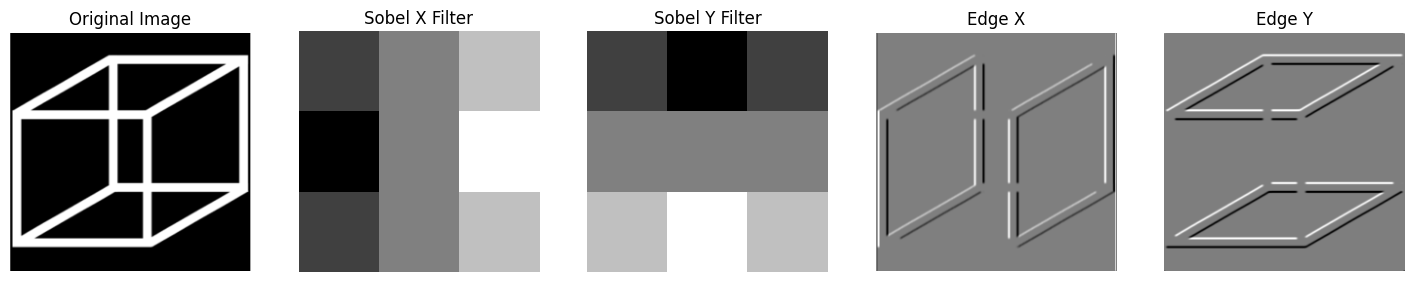

In [6]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
from torchvision import transforms


url = "https://i.ibb.co/D42QSXS/Screenshot-2024-05-04-174743.png"
response = requests.get(url)
img = Image.open(BytesIO(response.content)).convert('L')  # Convert to grayscale


sobel_x = torch.tensor([[-1, 0, 1],
                        [-2, 0, 2],
                        [-1, 0, 1]], dtype=torch.float32).unsqueeze(0).unsqueeze(0)

sobel_y = torch.tensor([[-1, -2, -1],
                        [ 0,  0,  0],
                        [ 1,  2,  1]], dtype=torch.float32).unsqueeze(0).unsqueeze(0)


# Convert the image to tensor and add batch dimension [B, C, H, W]
tensor_img = transforms.ToTensor()(img).unsqueeze(0)


edge_x = F.conv2d(tensor_img, sobel_x, padding=1)
edge_y = F.conv2d(tensor_img, sobel_y, padding=1)


def show_filter(filter_tensor, title):
    # Function to display a filter as an image
    plt.imshow(filter_tensor.squeeze(), cmap='gray')
    plt.title(title)
    plt.axis('off')


def show_tensor_img(tensor, title):
    # Function to display image from tensor
    plt.imshow(tensor[0, 0], cmap='gray')
    plt.title(title)
    plt.axis('off')


plt.figure(figsize=(18, 6))

# Display original image
plt.subplot(1, 5, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Display Sobel X Filter
plt.subplot(1, 5, 2)
show_filter(sobel_x, 'Sobel X Filter')

# Display Sobel Y Filter
plt.subplot(1, 5, 3)
show_filter(sobel_y, 'Sobel Y Filter')

# Display result from Sobel X
plt.subplot(1, 5, 4)
show_tensor_img(edge_x, 'Edge X')

# Display result from Sobel Y
plt.subplot(1, 5, 5)
show_tensor_img(edge_y, 'Edge Y')

plt.show()

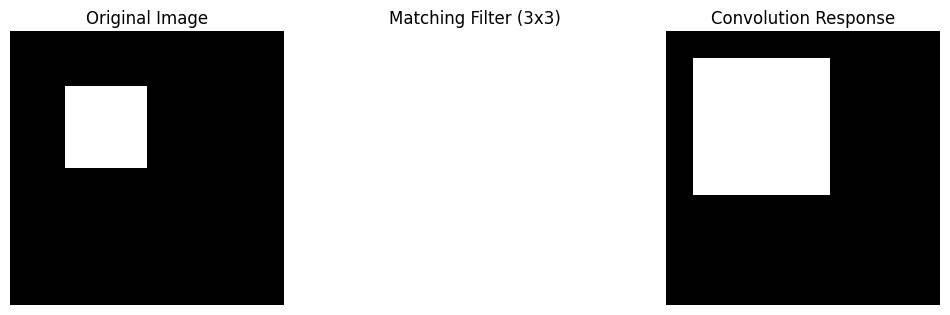

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F

# Create a simple synthetic image (10x10) with a specific pattern
image = torch.zeros((1, 10, 10))
image[0, 2:5, 2:5] = 1  # A small square pattern

# Define a matching filter (3x3)
matching_filter = torch.tensor([[1., 1., 1.],
                                [1., 1., 1.],
                                [1., 1., 1.]])

# Manual convolution function using sliding window
def manual_conv2d(image, kernel):
    # Assuming the image and kernel are square and kernel size is odd
    k_size = kernel.shape[0]
    pad = k_size // 2
    image_padded = F.pad(image, (pad, pad, pad, pad), mode='constant', value=0)  # Add zero padding to the image

    # Get the dimensions of the padded image
    height, width = image_padded.shape

    # Prepare output feature map
    feature_map = torch.zeros((height - k_size + 1, width - k_size + 1))

    # Perform convolution
    for i in range(height - k_size + 1):
        for j in range(width - k_size + 1):
            # Extract the current window
            window = image_padded[i:i+k_size, j:j+k_size]
            # Element-wise multiplication
            conv_sum = torch.sum(window * kernel)
            # Store the result
            feature_map[i, j] = conv_sum

    return feature_map

# Apply manual convolution
response = manual_conv2d(image[0], matching_filter)


# Function to plot images
def plot_image(ax, img, title):
    ax.imshow(img, cmap='gray', vmin=0, vmax=1)
    ax.set_title(title)
    ax.axis('off')

fig, ax = plt.subplots(1, 3, figsize=(12, 5))

# Plot the original image
plot_image(ax[0], image[0], "Original Image")

# Plot the filter
plot_image(ax[1], matching_filter, "Matching Filter (3x3)")

# Plot the convolution response
plot_image(ax[2], response, "Convolution Response")

plt.show()

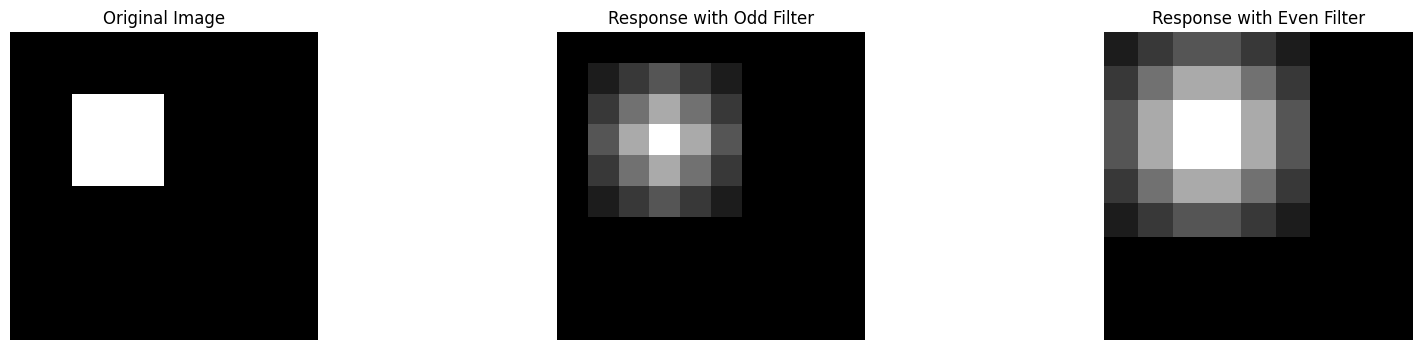

In [15]:
import torch
import matplotlib.pyplot as plt

# Create a simple synthetic image (10x10) with a specific pattern
image = torch.zeros((1, 10, 10))
image[0, 2:5, 2:5] = 1  # A small square pattern

# Define an odd-sized filter (3x3)
odd_filter = torch.tensor([[1., 1., 1.],
                           [1., 1., 1.],
                           [1., 1., 1.]])

# Define an even-sized filter (4x4)
even_filter = torch.tensor([[1., 1., 1., 1.],
                            [1., 1., 1., 1.],
                            [1., 1., 1., 1.],
                            [1., 1., 1., 1.]])

# Manual convolution function for generic use
def manual_conv2d(image, kernel):
    k_size = kernel.shape[0]
    pad = (k_size // 2) if k_size % 2 != 0 else (k_size // 2 - 1)
    image_padded = torch.nn.functional.pad(image, (pad, pad, pad, pad), mode='constant', value=0)

    # Prepare output feature map
    feature_map = torch.zeros((image_padded.shape[0] - k_size + 1, image_padded.shape[1] - k_size + 1))

    # Perform convolution
    for i in range(feature_map.shape[0]):
        for j in range(feature_map.shape[1]):
            window = image_padded[i:i+k_size, j:j+k_size]
            feature_map[i, j] = torch.sum(window * kernel)

    return feature_map

# Apply convolution with odd and even filters
response_odd = manual_conv2d(image[0], odd_filter)
response_even = manual_conv2d(image[0], even_filter)

# Function to plot images
def plot_image(ax, img, title):
    ax.imshow(img, cmap='gray')
    ax.set_title(title)
    ax.axis('off')

# Plotting
fig, ax = plt.subplots(1, 3, figsize=(20, 4))
plot_image(ax[0], image[0], "Original Image")
# plot_image(ax[1], odd_filter, "Odd Filter (3x3)")
plot_image(ax[1], response_odd, "Response with Odd Filter")
# plot_image(ax[3], even_filter, "Even Filter (4x4)")
plot_image(ax[2], response_even, "Response with Even Filter")
plt.show()


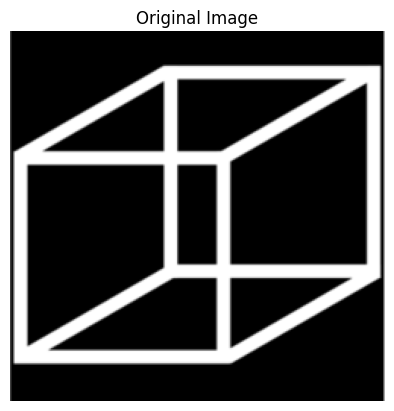

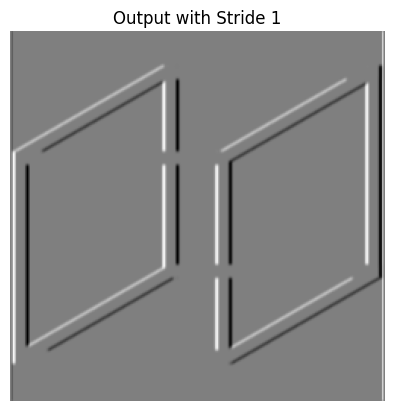

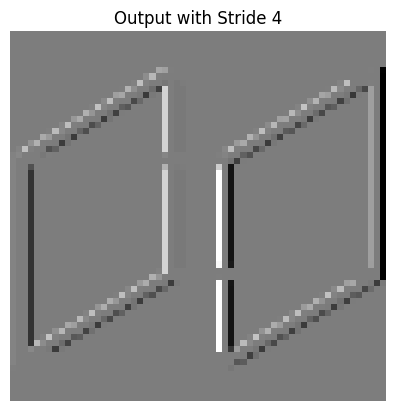

In [19]:
# Load image from URL
url = "https://i.ibb.co/D42QSXS/Screenshot-2024-05-04-174743.png"
response = requests.get(url)
img = Image.open(BytesIO(response.content)).convert('L')  # Convert to grayscale

# Convert image to tensor
tensor_img = transforms.ToTensor()(img).unsqueeze(0)

# Define a simple Sobel filter for edge detection
sobel_filter = torch.tensor([[-1., 0., 1.],
                             [-2., 0., 2.],
                             [-1., 0., 1.]]).unsqueeze(0).unsqueeze(0)

# Apply convolution with stride 1
output_stride1 = F.conv2d(tensor_img, sobel_filter, padding=1, stride=1)

# Apply convolution with stride 2
output_stride2 = F.conv2d(tensor_img, sobel_filter, padding=1, stride=4)

# Function to display the images
def display_image(tensor, title):
    tensor = tensor[0, 0].detach()  # Remove batch and channel dimensions, and detach from graph
    plt.figure()
    plt.imshow(tensor, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Display original image
plt.figure()
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

# Display output with stride 1
display_image(output_stride1, 'Output with Stride 1')

# Display output with stride 2
display_image(output_stride2, 'Output with Stride 4')

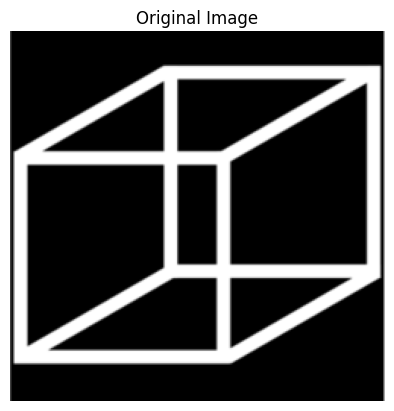

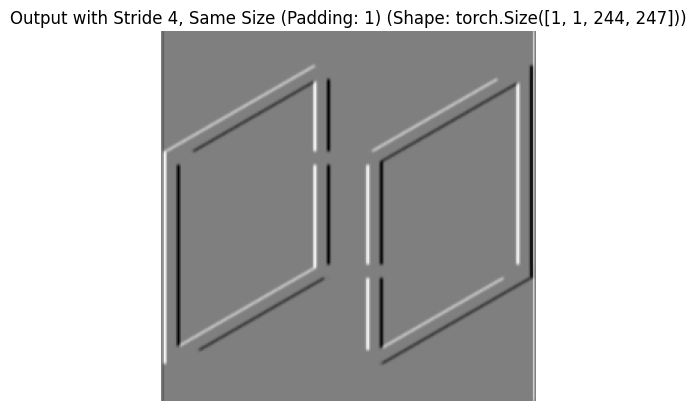

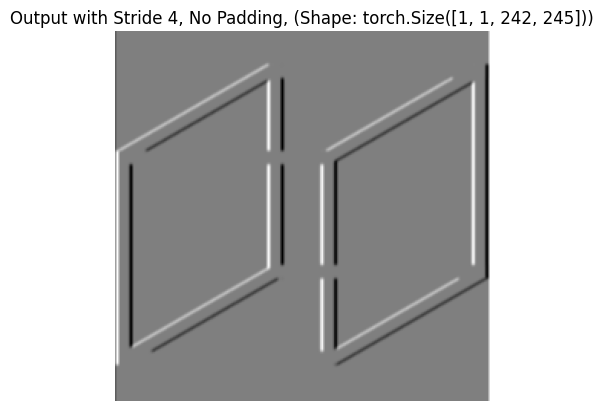

In [24]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
from torchvision import transforms

# Load image from URL
url = "https://i.ibb.co/D42QSXS/Screenshot-2024-05-04-174743.png"
response = requests.get(url)
img = Image.open(BytesIO(response.content)).convert('L')  # Convert to grayscale

# Convert image to tensor
tensor_img = transforms.ToTensor()(img).unsqueeze(0)

# Define a simple Sobel filter for edge detection
sobel_filter = torch.tensor([[-1., 0., 1.],
                             [-2., 0., 2.],
                             [-1., 0., 1.]]).unsqueeze(0).unsqueeze(0)

# Calculate required padding to maintain input size
# Kernel size = 3, Stride = 4
# Output size = (Input size + 2*Padding - Kernel size) / Stride + 1 = Input size
# Solving for Padding when Input size = Output size:
kernel_size = 3
stride = 1
input_size = tensor_img.size(2)  # Assuming square images
padding = ((input_size - 1) * stride + kernel_size - input_size) // 2

# Apply convolution with stride 4 and padding to keep same size
output_same_size = F.conv2d(tensor_img, sobel_filter, padding=padding, stride=1)

# Apply convolution with stride 4 and no padding
output_no_padding = F.conv2d(tensor_img, sobel_filter, padding=0, stride=1)

# Function to display the images
def display_image(tensor, title):
    tensor = tensor[0, 0].detach()  # Remove batch and channel dimensions, and detach from graph
    plt.figure()
    plt.imshow(tensor, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Display original image
plt.figure()
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

# Display output with stride 4 and padding to keep the same size
display_image(output_same_size, 'Output with Stride 4, Same Size (Padding: {}) (Shape: {})'.format(padding, output_same_size.shape))

# Display output with stride 4 and no padding
display_image(output_no_padding, 'Output with Stride 4, No Padding, (Shape: {})'.format(output_no_padding.shape))
